In [ ]:
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [51]:
for i in range(len(df["Taxable.Income"])):
    if df["Taxable.Income"][i] <= 30000:
        df["Taxable.Income"][i] = 'risky'
    else:
        df["Taxable.Income"][i] = 'good'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

In [52]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [53]:
df.shape

(600, 6)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [55]:
df1=df.drop_duplicates()

In [56]:
df1.shape

(600, 6)

In [57]:
colnames = list(df1.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [58]:
df1=pd.get_dummies(df1)
df2=df1.drop('Marital.Status_Single',axis=1)
df3=df2.drop('Marital.Status_Divorced',axis=1)
df4=df3.drop('Undergrad_NO',axis=1)
df5=df4.drop('Urban_NO',axis=1)
df=df5.drop('Taxable.Income_good',axis=1)
df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Taxable.Income_risky,Urban_YES
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [59]:
df1=df.rename({'Undergrad_YES':'Undergrad','Marital.Status_Married':'Marital.Status','Urban_YES':'Urban','Taxable.Income_risky':'Taxable.Income'},axis=1)
df1

,City.Population,Work.Experience,Undergrad,Marital.Status,Taxable.Income,Urban
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [60]:
df1.corr()

,City.Population,Work.Experience,Undergrad,Marital.Status,Taxable.Income,Urban
City.Population,1.000000,0.013135,0.079579,-0.007035,0.012225,-0.040098
Work.Experience,0.013135,1.000000,-0.005362,0.033347,-0.001972,-0.094559
Undergrad,0.079579,-0.005362,1.000000,0.015120,0.012523,-0.000267
Marital.Status,-0.007035,0.033347,0.015120,1.000000,0.043178,0.016771
Taxable.Income,0.012225,-0.001972,0.012523,0.043178,1.000000,0.004830
Urban,-0.040098,-0.094559,-0.000267,0.016771,0.004830,1.000000


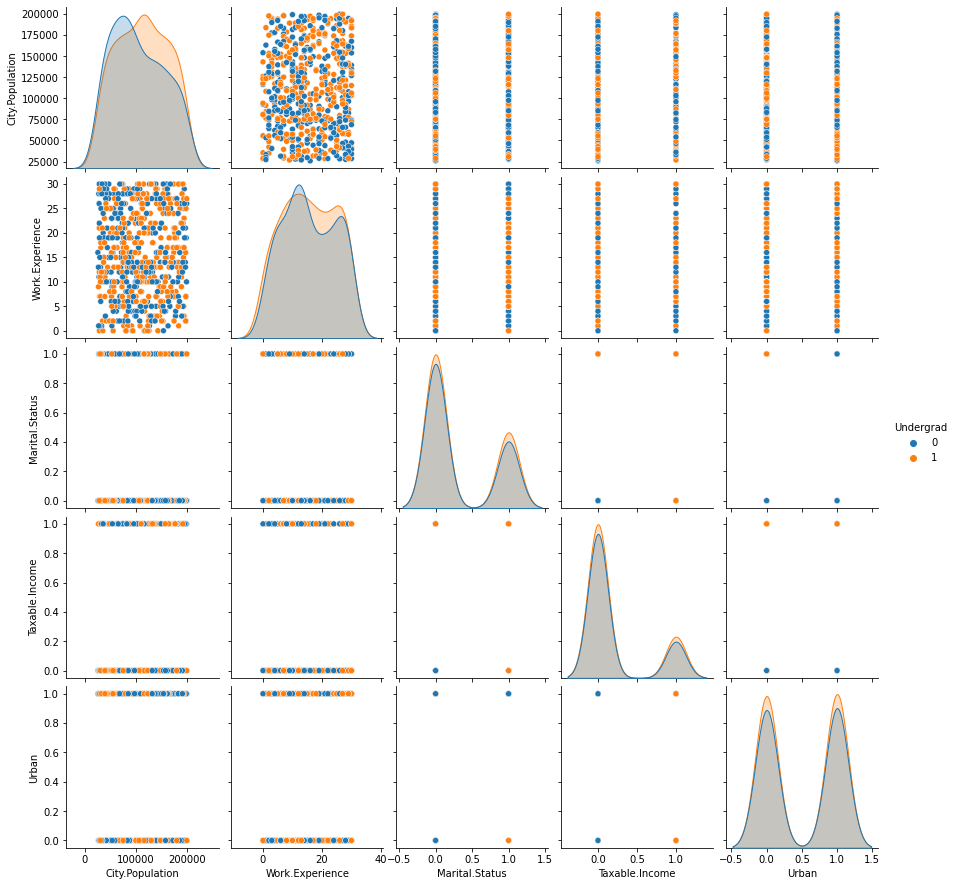

In [61]:
import seaborn as sns
sns.pairplot(df1,hue='Undergrad')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


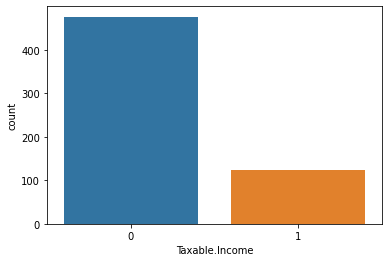

In [62]:
sns.countplot(df1["Taxable.Income"])

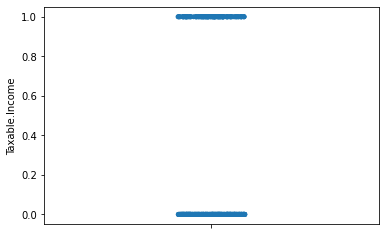

In [63]:
import matplotlib.pyplot as plt
sns.stripplot(y= 'Taxable.Income', data=df1,jitter=True,)
plt.ylabel('Taxable.Income')
plt.show()

In [64]:
x=df1.iloc[:, [0,1,2,3,5]]
y=df1.iloc[:,4]

In [65]:
x,y

(     City.Population  Work.Experience  Undergrad  Marital.Status  Urban
 0              50047               10          0               0      1
 1             134075               18          1               0      1
 2             160205               30          0               1      1
 3             193264               15          1               0      1
 4              27533               28          0               1      0
 ..               ...              ...        ...             ...    ...
 595            39492                7          1               0      1
 596            55369                2          1               0      1
 597           154058                0          0               0      1
 598           180083               17          1               1      0
 599           158137               16          0               0      0
 
 [600 rows x 5 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 595    0
 596    0
 597    0
 598    

In [66]:
#Fitting of model

In [67]:
# Bagged Decision Trees for Classification
seed=12
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7266666666666666


In [68]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7366666666666666


In [69]:
# create the sub models
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
estimators = []
model1 = DecisionTreeClassifier()
estimators.append(('cart', model1))
model2 =  RandomForestClassifier()
estimators.append((' RandomForestClassifier', model2))
model3 = SVC()
estimators.append(('svm', model3))


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7516666666666666


## Hyperparameter optimization using RandomizedSearchCV(xgboost)

In [70]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [73]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [74]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [75]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [77]:
from datetime import datetime
# Here we go
start_time = timer(None) 
random_search.fit(x,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time taken: 0 hours 0 minutes and 1.96 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.9s finished


In [78]:
random_search.best_estimator_
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 5}

In [79]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)
score

array([0.78333333, 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.75      , 0.78333333, 0.76666667, 0.78333333])

In [82]:
score.mean()

0.7866666666666666

## Optimize hyperparameters of the model using Optuna

In [ ]:
!pip install optuna
import optuna

In [87]:
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,x,y, n_jobs=-1, cv=3).mean()

In [88]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-03-23 03:38:59,180] A new study created in memory with name: no-name-ca7eb368-b077-48ff-b0d4-df8b6ea8cef0
[I 2021-03-23 03:38:59,261] Trial 0 finished with value: 0.7933333333333333 and parameters: {'classifier': 'SVC', 'svc_c': 823681.4379870438}. Best is trial 0 with value: 0.7933333333333333.
[I 2021-03-23 03:39:02,983] Trial 1 finished with value: 0.7399999999999999 and parameters: {'classifier': 'RandomForest', 'n_estimators': 840, 'max_depth': 32.98653694646915}. Best is trial 0 with value: 0.7933333333333333.
[I 2021-03-23 03:39:03,018] Trial 2 finished with value: 0.7933333333333333 and parameters: {'classifier': 'SVC', 'svc_c': 2.229083382457899e-05}. Best is trial 0 with value: 0.7933333333333333.
[I 2021-03-23 03:39:03,074] Trial 3 finished with value: 0.7933333333333333 and parameters: {'classifier': 'SVC', 'svc_c': 488.8072512077783}. Best is trial 0 with value: 0.7933333333333333.
[I 2021-03-23 03:39:03,113] Trial 4 finished with value: 0.7933333333333333 and para

Accuracy: 0.7933333333333333
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 823681.4379870438}


In [89]:
trial

FrozenTrial(number=0, values=[0.7933333333333333], datetime_start=datetime.datetime(2021, 3, 23, 3, 38, 59, 184139), datetime_complete=datetime.datetime(2021, 3, 23, 3, 38, 59, 261054), params={'classifier': 'SVC', 'svc_c': 823681.4379870438}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'SVC')), 'svc_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

In [90]:
study.best_params

{'classifier': 'SVC', 'svc_c': 823681.4379870438}

In [92]:
rf=RandomForestClassifier(n_estimators=330,max_depth=30)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=330,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## #Alternative Method:(Random Forest Regression)

In [ ]:
Y=y.values.reshape(-1,1)

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(df1.iloc[:, [0,1,2,3,5]])
X = stscaler.transform(df1.iloc[:, [0,1,2,3,5]])
X

array([[-1.17852072, -0.62914254, -1.040833  , -0.6912543 ,  0.99335541],
       [ 0.50850002,  0.27636996,  0.96076892, -0.6912543 ,  0.99335541],
       [ 1.03310911,  1.63463872, -1.040833  ,  1.4466456 ,  0.99335541],
       ...,
       [ 0.90969648, -1.76103318, -1.040833  , -0.6912543 ,  0.99335541],
       [ 1.43219749,  0.1631809 ,  0.96076892,  1.4466456 , -1.00668904],
       [ 0.9915901 ,  0.04999184, -1.040833  , -0.6912543 , -1.00668904]])

In [ ]:
stscaler = StandardScaler().fit(Y)
Y = stscaler.transform(Y)
Y

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=50)

In [ ]:
# Fitting Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 50)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [ ]:
 #accuracy
regressor.score(x_test,y_test)

-0.23636363636363633

In [ ]:
# Prediction
y_pred= regressor.predict(x_test)
y_pred

array([ 0.97139907, -0.26343026, -0.01646439,  0.72443321, -0.01646439,
       -0.51039612, -0.01646439,  0.23050147,  0.23050147,  0.72443321,
       -0.26343026,  0.47746734, -0.01646439,  0.23050147,  0.23050147,
       -0.26343026,  0.23050147, -0.51039612,  0.47746734, -0.01646439,
       -0.26343026, -0.01646439,  0.72443321, -0.51039612, -0.51039612,
        0.23050147, -0.51039612,  0.23050147, -0.51039612, -0.26343026,
        0.23050147, -0.26343026,  0.23050147, -0.51039612,  0.72443321,
       -0.26343026,  0.47746734,  0.47746734, -0.51039612,  0.47746734,
       -0.51039612, -0.01646439,  1.21836494,  0.72443321,  0.23050147,
        0.23050147,  0.23050147, -0.01646439,  0.97139907, -0.01646439,
       -0.26343026, -0.26343026, -0.26343026,  0.72443321, -0.51039612,
        0.23050147, -0.01646439, -0.26343026,  0.47746734, -0.51039612,
       -0.26343026, -0.51039612, -0.26343026, -0.51039612, -0.01646439,
       -0.51039612, -0.51039612, -0.01646439, -0.01646439,  0.23

In [ ]:
# Visualising the Random Forest Regression 
X_grid = X[np.arrange[all(min(X), max(X), 0.01)]
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Factors')
plt.ylabel('Taxable.Income')
plt.show()

# Q.2
Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
sales= ["[{0}] - [{1}]".format(Sales,Sales+ 1.0) for Sales in range(2,15,1)]
sales

['[2] - [3.0]',
 '[3] - [4.0]',
 '[4] - [5.0]',
 '[5] - [6.0]',
 '[6] - [7.0]',
 '[7] - [8.0]',
 '[8] - [9.0]',
 '[9] - [10.0]',
 '[10] - [11.0]',
 '[11] - [12.0]',
 '[12] - [13.0]',
 '[13] - [14.0]',
 '[14] - [15.0]']

In [4]:
count_sales=len(sales)
count_sales

13

In [5]:
df['Sale']= pd.cut(x=df['Sales'],bins=count_sales, labels= sales)
df['Sale']

0       [9] - [10.0]
1      [10] - [11.0]
2      [10] - [11.0]
3        [7] - [8.0]
4        [5] - [6.0]
           ...      
395    [12] - [13.0]
396      [6] - [7.0]
397      [7] - [8.0]
398      [6] - [7.0]
399     [9] - [10.0]
Name: Sale, Length: 400, dtype: category
Categories (13, object): ['[2] - [3.0]' < '[3] - [4.0]' < '[4] - [5.0]' < '[5] - [6.0]' < ... <
                          '[11] - [12.0]' < '[12] - [13.0]' < '[13] - [14.0]' < '[14] - [15.0]']

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,[9] - [10.0]
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,[10] - [11.0]
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,[10] - [11.0]
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,[7] - [8.0]
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,[5] - [6.0]


In [7]:
df1=df['Sale'].value_counts()
df2=df.drop('Sales',axis=1)
df2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,[9] - [10.0]
1,111,48,16,260,83,Good,65,10,Yes,Yes,[10] - [11.0]
2,113,35,10,269,80,Medium,59,12,Yes,Yes,[10] - [11.0]
3,117,100,4,466,97,Medium,55,14,Yes,Yes,[7] - [8.0]
4,141,64,3,340,128,Bad,38,13,Yes,No,[5] - [6.0]


In [8]:
df2.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
Sale           category
dtype: object

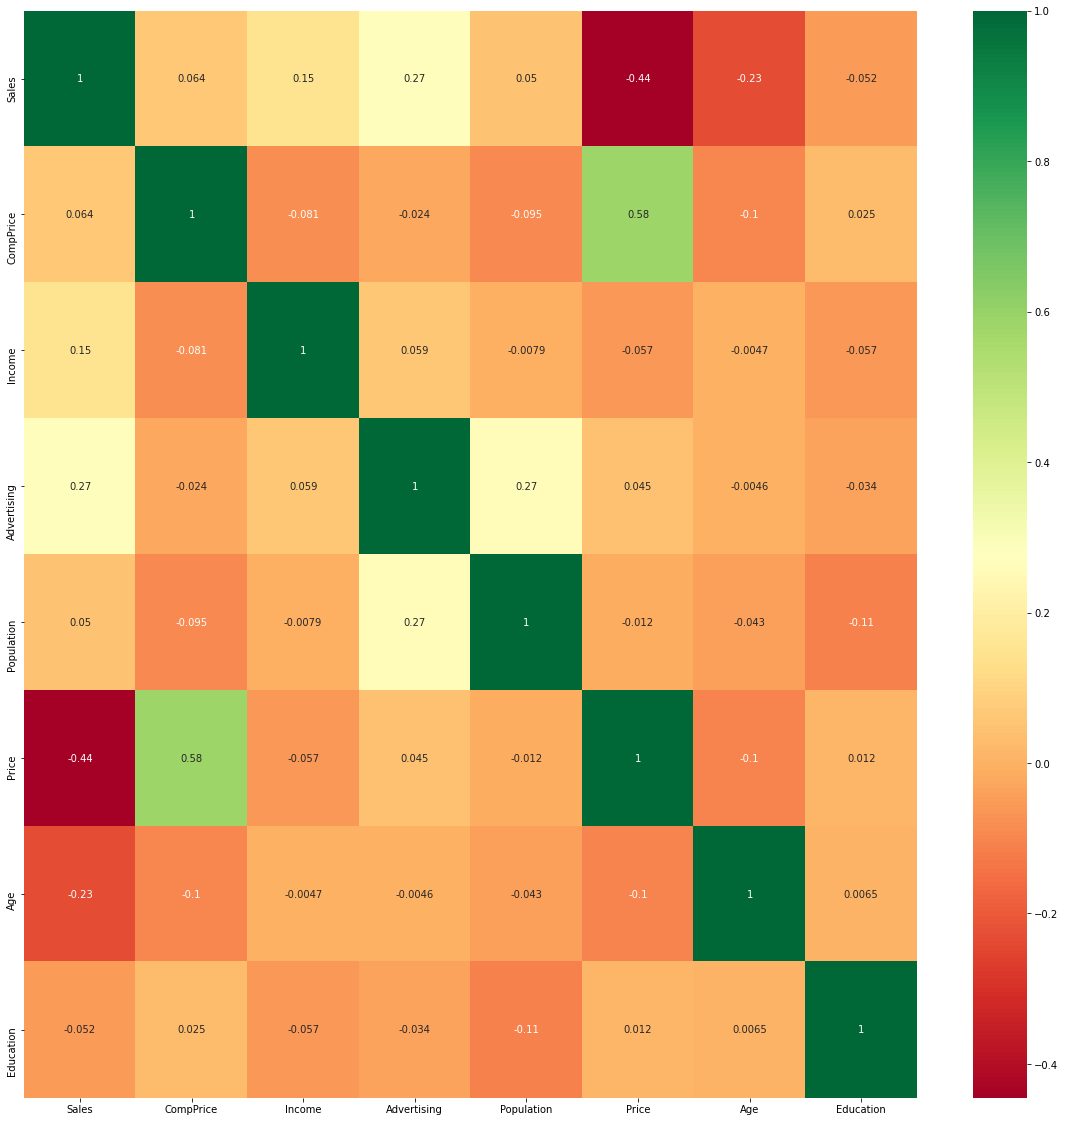

In [ ]:
##Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


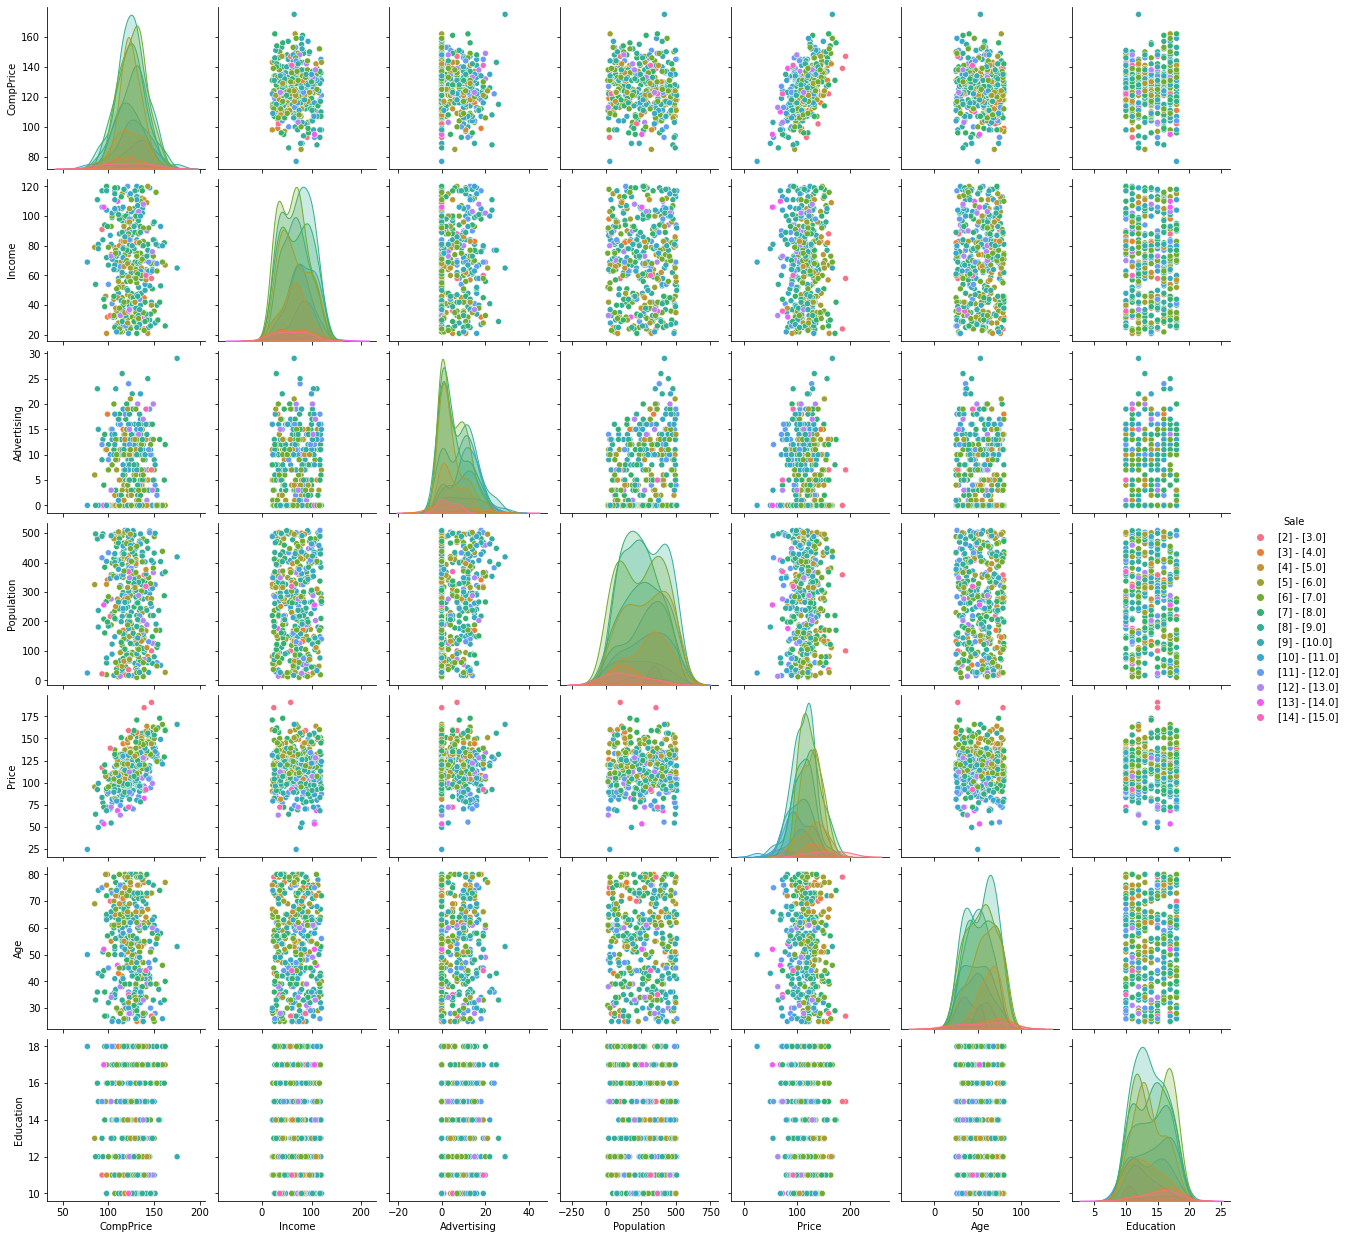

In [9]:
import seaborn as sns
sns.pairplot(df2,hue='Sale')

In [10]:
y=df2.iloc[:,-1]
x=df2.iloc[:,:10]

In [11]:
x,y

(     CompPrice  Income  Advertising  Population  ...  Age Education  Urban   US
 0          138      73           11         276  ...   42        17    Yes  Yes
 1          111      48           16         260  ...   65        10    Yes  Yes
 2          113      35           10         269  ...   59        12    Yes  Yes
 3          117     100            4         466  ...   55        14    Yes  Yes
 4          141      64            3         340  ...   38        13    Yes   No
 ..         ...     ...          ...         ...  ...  ...       ...    ...  ...
 395        138     108           17         203  ...   33        14    Yes  Yes
 396        139      23            3          37  ...   55        11     No  Yes
 397        162      26           12         368  ...   40        18    Yes  Yes
 398        100      79            7         284  ...   50        12    Yes  Yes
 399        134      37            0          27  ...   49        16    Yes  Yes
 
 [400 rows x 10 columns], 

In [12]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49,51,11,141,54,0,17,7,1,1
1,22,27,16,129,18,1,40,0,1,1
2,24,14,10,138,15,2,34,2,1,1
3,28,77,4,249,31,2,30,4,1,1
4,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...
395,49,85,17,104,62,1,8,4,1,1
396,50,2,3,17,54,2,30,1,0,1
397,71,5,12,195,91,2,15,8,1,1
398,12,57,7,145,29,0,25,2,1,1


In [13]:
#standardization
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X

array([[ 0.87086956,  0.15944471,  0.65952892, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.94554435, -0.72227718,  1.41413867, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.81099518, -1.19987653,  0.50860697, ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.35091053, -1.53052224,  0.81045087, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.61829025,  0.37987518,  0.05584112, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.6017712 , -1.12639971, -1.00061253, ...,  0.80236876,
         0.64686916,  0.74188112]])

In [14]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
n_nodes = rfc.estimators_[0].tree_.node_count
n_nodes

261

In [17]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array(['[6] - [7.0]', '[8] - [9.0]', '[8] - [9.0]', '[8] - [9.0]',
       '[7] - [8.0]', '[8] - [9.0]', '[10] - [11.0]', '[9] - [10.0]',
       '[8] - [9.0]', '[10] - [11.0]', '[7] - [8.0]', '[6] - [7.0]',
       '[9] - [10.0]', '[6] - [7.0]', '[11] - [12.0]', '[6] - [7.0]',
       '[9] - [10.0]', '[7] - [8.0]', '[7] - [8.0]', '[7] - [8.0]',
       '[10] - [11.0]', '[11] - [12.0]', '[6] - [7.0]', '[10] - [11.0]',
       '[6] - [7.0]', '[5] - [6.0]', '[10] - [11.0]', '[5] - [6.0]',
       '[7] - [8.0]', '[12] - [13.0]', '[13] - [14.0]', '[6] - [7.0]',
       '[10] - [11.0]', '[10] - [11.0]', '[8] - [9.0]', '[8] - [9.0]',
       '[7] - [8.0]', '[6] - [7.0]', '[8] - [9.0]', '[8] - [9.0]',
       '[7] - [8.0]', '[5] - [6.0]', '[6] - [7.0]', '[9] - [10.0]',
       '[6] - [7.0]', '[8] - [9.0]', '[5] - [6.0]', '[5] - [6.0]',
       '[6] - [7.0]', '[7] - [8.0]', '[6] - [7.0]', '[7] - [8.0]',
       '[10] - [11.0]', '[7] - [8.0]', '[5] - [6.0]', '[10] - [11.0]',
       '[9] - [10.0]', '[7] - [8

In [18]:
print(confusion_matrix(y_test,rfc_pred))

[[2 2 0 0 0 0 0 0 1 0 0 2]
 [2 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 2 1 2 1 0]
 [0 0 0 0 0 0 0 4 4 3 1 0]
 [0 0 0 0 0 0 0 1 1 3 4 0]
 [1 0 0 0 0 0 0 1 4 4 5 1]
 [3 0 0 0 0 0 0 2 0 4 1 2]
 [4 0 0 0 0 0 0 0 1 1 2 1]]


In [19]:
accuracy_score(y_test,rfc_pred)

0.1875

In [20]:
print(classification_report(y_test,rfc_pred))

               precision    recall  f1-score   support

[10] - [11.0]       0.17      0.29      0.21         7
[11] - [12.0]       0.00      0.00      0.00         4
[12] - [13.0]       1.00      0.50      0.67         2
[13] - [14.0]       1.00      1.00      1.00         1
  [2] - [3.0]       0.00      0.00      0.00         1
  [3] - [4.0]       0.00      0.00      0.00         1
  [4] - [5.0]       0.00      0.00      0.00         6
  [5] - [6.0]       0.40      0.33      0.36        12
  [6] - [7.0]       0.07      0.11      0.09         9
  [7] - [8.0]       0.21      0.25      0.23        16
  [8] - [9.0]       0.07      0.08      0.07        12
 [9] - [10.0]       0.17      0.11      0.13         9

     accuracy                           0.19        80
    macro avg       0.26      0.22      0.23        80
 weighted avg       0.19      0.19      0.18        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hyperparameter Tuning

In [30]:
#Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[3 0 0 0 0 0 0 0 0 0 2 2]
 [2 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 2 0]
 [0 0 0 0 0 0 0 0 9 3 0 0]
 [0 0 0 0 0 0 0 0 3 3 3 0]
 [2 0 0 0 0 0 0 0 3 5 5 1]
 [2 0 0 0 0 0 0 0 0 1 8 1]
 [3 0 0 0 0 0 0 0 2 2 2 0]]
0.2375
               precision    recall  f1-score   support

[10] - [11.0]       0.25      0.43      0.32         7
[11] - [12.0]       0.00      0.00      0.00         4
[12] - [13.0]       0.00      0.00      0.00         2
[13] - [14.0]       0.00      0.00      0.00         1
  [2] - [3.0]       0.00      0.00      0.00         1
  [3] - [4.0]       0.00      0.00      0.00         1
  [4] - [5.0]       0.00      0.00      0.00         6
  [5] - [6.0]       0.00      0.00      0.00        12
  [6] - [7.0]       0.13      0.33      0.19         9
  [7] - [8.0]       0.33      0.31      0.32        16
  [8] - [9.0]       0.33      0.67      0.44        12
 [9] - 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Randomized Search Cv
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [32]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [34]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[3 0 0 0 0 0 0 0 0 0 2 2]
 [2 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 2 1 3 0 0]
 [0 0 0 0 0 0 0 1 7 2 2 0]
 [0 0 0 0 0 0 0 0 6 1 2 0]
 [1 0 0 0 0 0 0 0 5 4 6 0]
 [4 0 0 0 0 0 0 1 0 3 3 1]
 [4 0 0 0 0 0 0 0 1 2 2 0]]
Accuracy Score 0.2125
Classification report:                precision    recall  f1-score   support

[10] - [11.0]       0.21      0.43      0.29         7
[11] - [12.0]       0.00      0.00      0.00         4
[12] - [13.0]       0.00      0.00      0.00         2
[13] - [14.0]       0.00      0.00      0.00         1
  [2] - [3.0]       0.00      0.00      0.00         1
  [3] - [4.0]       0.00      0.00      0.00         1
  [4] - [5.0]       0.00      0.00      0.00         6
  [5] - [6.0]       0.20      0.08      0.12        12
  [6] - [7.0]       0.29      0.67      0.40         9
  [7] - [8.0]       0.27      0.25      0.26        16
  [8] - [9.0]       0.16

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## For Visualization:

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1534467341, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1718121900, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

In [38]:
len(clf.estimators_)

20

[Text(751.3074901254646, 844.1788235294117, 'X[2] <= 0.886\ngini = 0.871\nsamples = 207\nvalue = [33, 21, 9, 0, 1, 4, 9, 18, 25, 56, 40, 66, 38]'),
 Text(478.40494307620816, 793.0164705882353, 'X[0] <= 2.216\ngini = 0.866\nsamples = 170\nvalue = [17, 18, 5, 0, 1, 4, 5, 15, 24, 53, 38, 47, 33]'),
 Text(325.85112685873605, 741.8541176470588, 'X[7] <= -1.299\ngini = 0.866\nsamples = 167\nvalue = [17, 18, 5, 0, 1, 4, 5, 15, 23, 53, 32, 47, 33]'),
 Text(45.63568773234201, 690.6917647058824, 'X[6] <= -1.38\ngini = 0.818\nsamples = 19\nvalue = [5, 8, 1, 0, 1, 0, 0, 1, 2, 0, 1, 8, 5]'),
 Text(16.594795539033456, 639.5294117647059, 'X[0] <= -0.34\ngini = 0.408\nsamples = 3\nvalue = [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]'),
 Text(8.297397769516728, 588.3670588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(24.892193308550183, 588.3670588235294, 'X[8] <= -0.45\ngini = 0.444\nsamples = 2\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]'),
 Text(16.594795

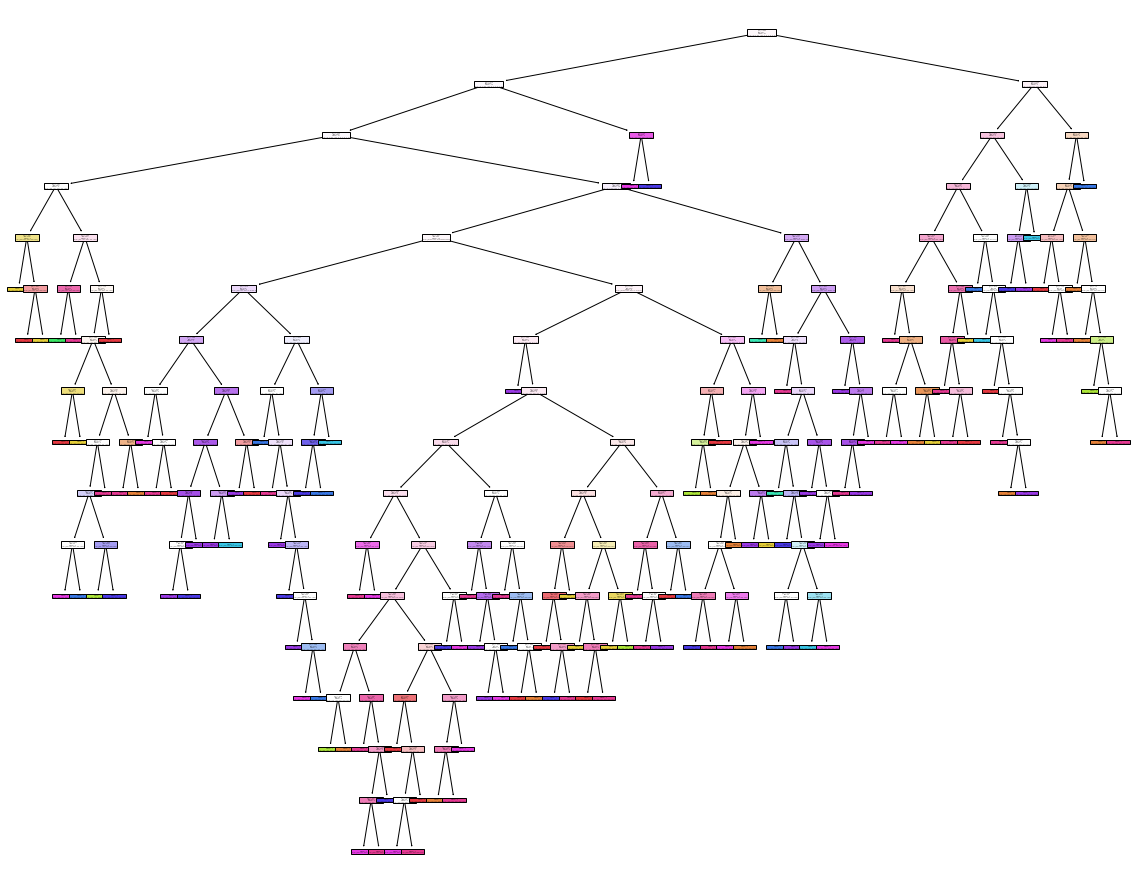

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,16))
tree.plot_tree(clf.estimators_[10],filled=True)

In [40]:
for i in range(len(clf.estimators_)):
  print(tree.export_text(clf.estimators_[i]))

|--- feature_2 <= -0.02
|   |--- feature_6 <= 1.49
|   |   |--- feature_4 <= -0.71
|   |   |   |--- feature_7 <= 1.38
|   |   |   |   |--- feature_0 <= -2.26
|   |   |   |   |   |--- class: 8.0
|   |   |   |   |--- feature_0 >  -2.26
|   |   |   |   |   |--- feature_3 <= -0.79
|   |   |   |   |   |   |--- feature_1 <= -0.83
|   |   |   |   |   |   |   |--- feature_5 <= 0.23
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- feature_5 >  0.23
|   |   |   |   |   |   |   |   |--- class: 10.0
|   |   |   |   |   |   |--- feature_1 >  -0.83
|   |   |   |   |   |   |   |--- feature_4 <= -1.07
|   |   |   |   |   |   |   |   |--- class: 11.0
|   |   |   |   |   |   |   |--- feature_4 >  -1.07
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_3 >  -0.79
|   |   |   |   |   |   |--- feature_3 <= 0.29
|   |   |   |   |   |   |   |--- feature_8 <= -0.45
|   |   |   |   |   |   |   |   |--- feature_4 <= -1.39
|   |   |   |   |   |   |  


alternative method

In [41]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.23500000000000001


In [42]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed=12
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.25999999999999995


In [43]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.16250000000000003


In [44]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
estimators.append(('randomforest', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.21000000000000002
